# Setup

## Colab

In [5]:
# Mount the drive and move to dir
from google.colab import drive
drive.mount("/content/drive", force_remount = False)
%cd /content/drive/MyDrive/Coding/spread-res/runscr/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coding/spread-res/runscr


## Imports

In [ ]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import os
import sys

import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the model architecture
from classes.models import BertGrid

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertGrid)

# Import the model and funcs required from utils
from classes.models.BertGrid import BertGrid
from utils.inferutil import infer_full, infer_one
from utils.setuputil import display_config, setup_config
from utils.trainutil import train_model

## Configuration

device = cuda/mps:0 (env-specific), threads = 1 to inf (env-specific), seed = 0 to inf, data_dir = ../data, rows = 100, cols = 100, tokens = 32, save_dir = ../models/

In [ ]:
# Setup the config
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertGrid",
    "model_base": "bert-base-cased",
    "data_ds": "100",
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 32,
    "num_hidden_layers": 1,
    "num_attention_heads": 1,
    "intermediate_size": 128,
    # Training Parameters
    "batch_size": 40,
    "lr": 1e-2,
    "mu": 0.25,
    "epochs": 20,
    "patience": 2,
    "save_int": 10,
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

Processing files: 100%|██████████| 80/80 [00:14<00:00,  5.54it/s]



80(P) = 80(G) + 0(E)


Processing files: 100%|██████████| 10/10 [00:00<00:00, 4324.02it/s]



10(P) = 10(G) + 0(E)


Processing files: 100%|██████████| 10/10 [00:00<00:00, 5715.09it/s]



10(P) = 10(G) + 0(E)

FINAL CONFIG:
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertPos",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "100",
  "data_dir": "../data",
  "train_dir": "../data/100_train",
  "val_dir": "../data/100_val",
  "test_dir": "../data/100_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 32,
  "num_hidden_layers": 1,
  "num_attention_heads": 1,
  "intermediate_size": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 40,
  "lr": 0.01,
  "mu": 0.25,
  "epochs": 20,
  "patience": 2,
  "sav

# Model Training

In [ ]:
# Create and observe the model
untrained_model = BertGrid(config).to(DEVICE)
print(untrained_model)

BertPos(
  (bertModel_cell): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 32, padding_idx=0)
      (position_embeddings): Embedding(64, 32)
      (token_type_embeddings): Embedding(2, 32)
      (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=32, out_features=32, bias=True)
              (key): Linear(in_features=32, out_features=32, bias=True)
              (value): Linear(in_features=32, out_features=32, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=32, out_features=32, bias=True)
              (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
    

## Training Metrics

1. GPU Model: 521 mb
2. GPU Training: 33.6 gb

3. Per Epoch Train Time: 1m16s
4. Per Epoch Val Time: 15s
5. Last Epoch: 16


In [ ]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 1/1 [00:14<00:00, 14.97s/it]


Train Loss: 1.3594e+00, Val Loss: 1.2925e+00


Epoch 1


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.12s/it]


Train Loss: 1.2313e+00, Val Loss: 8.8203e-01


Epoch 2


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.17s/it]


Train Loss: 1.0277e+00, Val Loss: 7.2556e-01


Epoch 3


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.24s/it]


Train Loss: 7.3609e-01, Val Loss: 4.4144e-01


Epoch 4


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.11s/it]


Train Loss: 4.8521e-01, Val Loss: 3.5525e-01


Epoch 5


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.17s/it]


Train Loss: 3.7019e-01, Val Loss: 2.6203e-01


Epoch 6


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.18s/it]


Train Loss: 3.1133e-01, Val Loss: 2.3809e-01


Epoch 7


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.23s/it]


Train Loss: 2.7187e-01, Val Loss: 3.1125e-01


Epoch 8


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.05s/it]


Train Loss: 2.3532e-01, Val Loss: 2.1023e-01


Epoch 9


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.16s/it]


Train Loss: 2.1686e-01, Val Loss: 6.1299e-01

Model Saved

Epoch 10


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.10s/it]


Train Loss: 1.8994e-01, Val Loss: 6.8608e-01


EARLY STOPPING at epoch 10, best epoch 8
Train Loss = 2.3532e-01, Val Loss = 2.1023e-01


TRAINING DONE at epoch 10, best epoch 8
Train Loss = 0.23532254993915558, Perplexity = 1.000000588306548
Val Loss = 0.2102290540933609, Perplexity = 1.0000005255727733


# Evaluation

In [ ]:
# Params
loc = 0
thresh = 0.5
infer_batch_size = 40

## Single Example


Filename: ../data/100_train/ALFA_Parameters.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(8,5): 0.904097 | (11,3): 0.932113 | (18,4): 0.933018 | (21,1): 0.933248 | (24,0): 0.934056 | (2,2): 0.935385 | (5,1): 0.935943

NB to B ratio: Predicted = 9928:72 | Actual = 9993:7
Accuracy: 99.35% | Precision: 9.72% | Recall: 100.00% | F1-Score: 0.18



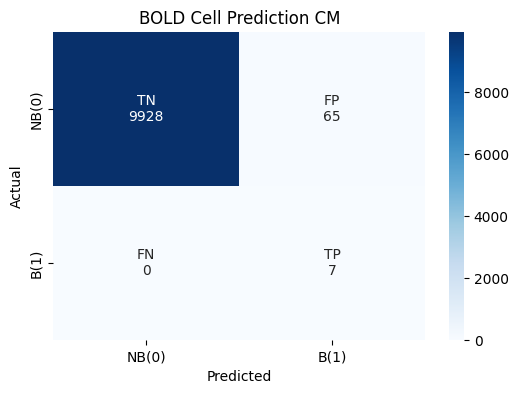


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
0,1,1,1,1,1,1,1
1,0,1,1,1,1,1,0
2,1,1,1,1,1,1,0
4,0,1,1,1,1,1,0
5,0,1,0,0,1,0,0
7,0,1,1,1,1,1,0
8,0,1,1,0,0,1,1
10,0,1,1,1,1,1,1
11,0,0,0,1,0,0,0
13,0,1,1,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5
2,0,0,1,0,0,0
5,0,1,0,0,0,0
8,0,0,0,0,0,1
11,0,0,0,1,0,0
18,0,0,0,0,1,0
21,0,1,0,0,0,0
24,1,0,0,0,0,0


In [ ]:
# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/100_val/LMDI_Combined.xlsx

NB to B ratio: Predicted = 9956:44 | Actual = 10000:0
Accuracy: 99.56% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



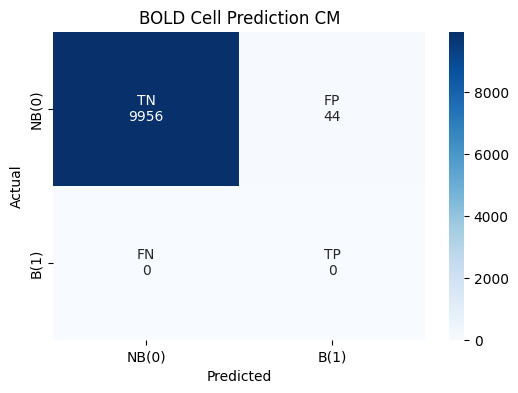


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3
0,0,1,0,0
1,1,0,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,1,0,1,0
9,1,0,0,0
10,0,1,1,1
11,0,0,1,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---
No bold cells in actual data.


In [ ]:
# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)


Filename: ../data/100_test/1415-bassessment-1.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(8,4): 0.047506 | (6,0): 0.071447 | (8,3): 0.134088 | (8,2): 0.310841 | (8,6): 0.793508 | (8,5): 0.903093 | (8,0): 0.935116 | (8,1): 0.935527

NB to B ratio: Predicted = 9793:207 | Actual = 9992:8
Accuracy: 97.93% | Precision: 1.93% | Recall: 50.00% | F1-Score: 0.04



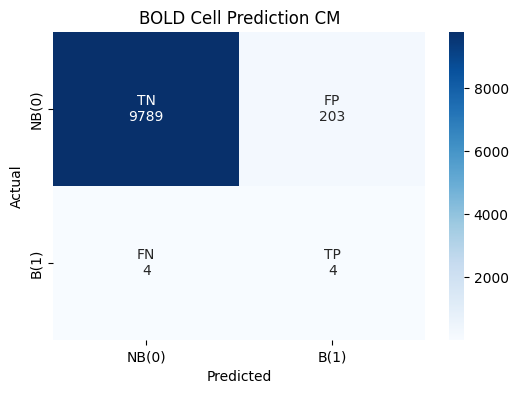


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0
2,1,1,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
8,1,1,0,0,0,1,1
9,0,1,0,1,1,1,1
10,0,0,0,0,1,1,0
11,1,0,1,0,1,1,1
12,1,1,1,0,1,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
6,1,0,0,0,0,0,0
8,1,1,1,1,1,1,1


In [ ]:
# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)

## All Examples

Batch Inference: 100%|██████████| 2/2 [00:30<00:00, 15.32s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 788898:11102 | Actual = 798240:1760
Accuracy: 98.83% | Precision: 15.80% | Recall: 99.67% | F1-Score: 0.27



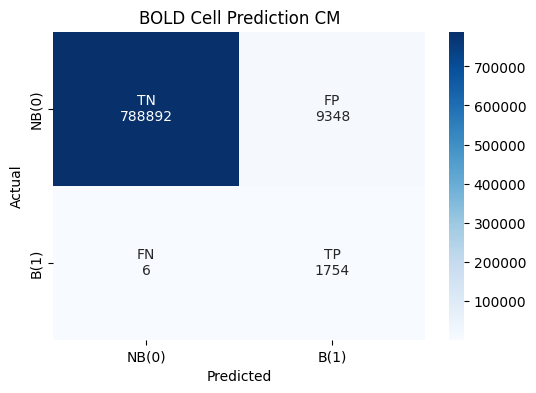

In [ ]:
# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:14<00:00, 14.93s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 99473:527 | Actual = 99799:201
Accuracy: 99.51% | Precision: 22.58% | Recall: 59.20% | F1-Score: 0.33



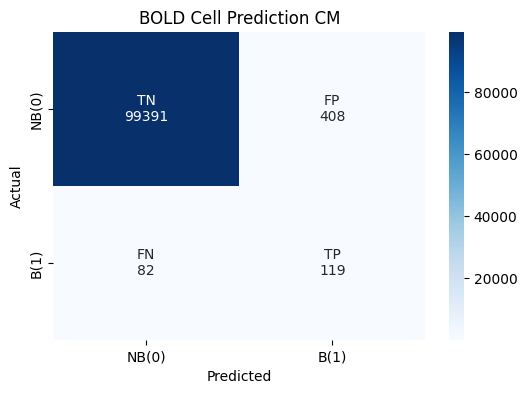

In [ ]:
# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=infer_batch_size,
    threshold=0.9331,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:14<00:00, 14.91s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 97380:2620 | Actual = 99738:262
Accuracy: 97.55% | Precision: 8.21% | Recall: 82.06% | F1-Score: 0.15



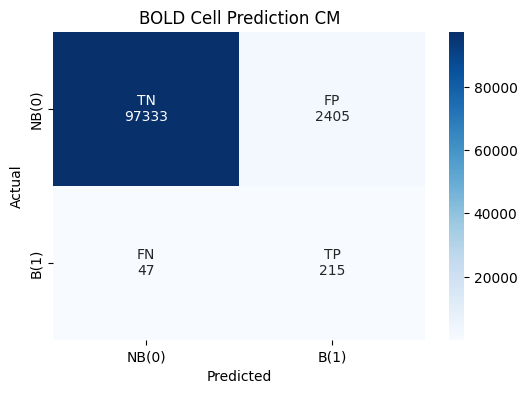

In [ ]:
# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)